In [1]:
import tensorflow as tf

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
#쇼핑몰 데이터 
print(trainX[0])
print(trainX.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [2]:
print(trainY) 
print(trainY.shape)
#옷 사진들의 대한 label값들
#class_names T-shirt/top : 0, Trouser : 1, Pullover : 2, Dress : 3, Coat : 4, Sandal : 5, Shirt : 6, Sneaker : 7, Bag : 8, Ankle : 9

[9 0 0 ... 3 0 5]
(60000,)


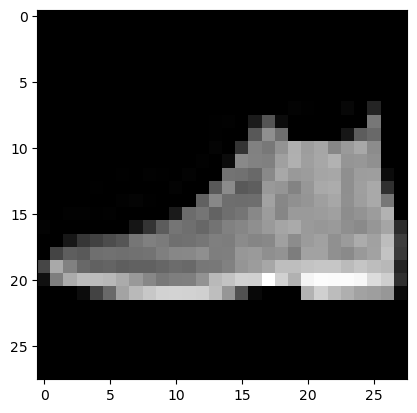

In [3]:
import matplotlib.pyplot as plt

plt.imshow(testX[0])
plt.gray()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

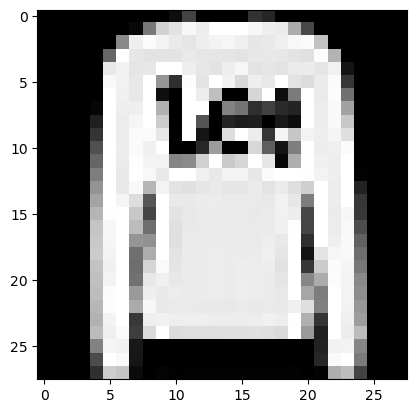

In [4]:
plt.imshow(testX[1])
plt.show

In [5]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle']

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 특성 추출
    tf.keras.layers.MaxPooling2D((2, 2)), #이미지의 최댓값 추출
    tf.keras.layers.Flatten(), #고차원의 배열을 1차원으로 줄여줌
    tf.keras.layers.Dense(128, input_shape=(28, 28, 1),activation="relu"), # 활성 함수 relu 사용
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 각 라벨별 확률 예측
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=10)

C:\Users\jos34\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jos34\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 701,578 (2.68 MB)

 Trainable params: 701,578 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7921 - loss: 2.9994 - val_accuracy: 0.8713 - val_loss: 0.3505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8981 - loss: 0.2826 - val_accuracy: 0.8885 - val_loss: 0.3265
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9078 - loss: 0.2510 - val_accuracy: 0.8884 - val_loss: 0.3129
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9150 - loss: 0.2271 - val_accuracy: 0.8944 - val_loss: 0.3292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9270 - loss: 0.2016 - val_accuracy: 0.8922 - val_loss: 0.3323
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9341 - loss: 0.1784 - val_accuracy: 0.8919 - val_loss: 0.3415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9369 - loss: 0.1669 - val_accuracy: 0.8898 - val_loss: 0.3722
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9449 - loss: 0.1470 

In [6]:
score = model.evaluate(testX, testY) #학습된 모델에 대한 평가
print(score)   # 정확도 차이 overfitting됨 기존 데이터에 대해 너무 학습됨 따라서 일반화가 잘 이루어 지지 않음

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.4022
[0.40330955386161804, 0.8971999883651733]


#종합 적으로 val_accuracy 높이는게 중요

CNN을 이용하여 Kaggle 개 고양이 구분 모델 제작
dataset : https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 생성기 정의
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# 훈련 및 검증 데이터셋 정의
train_ds = train_datagen.flow_from_directory(
    directory=r'D:\github\Deep-Learning-Practice\CNN\archive (1)\dogs_vs_cats\train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    subset='training',
    seed=1234
)

val_ds = val_datagen.flow_from_directory(
    directory=r'D:\github\Deep-Learning-Practice\CNN\archive (1)\dogs_vs_cats\train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    subset='validation',
    seed=1234
)

print(train_ds.shape)
print(val_ds)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [15]:
print(train_ds.shape)
print(val_ds.shape)

AttributeError: 'DirectoryIterator' object has no attribute 'shape'